In [1]:
import pandas as pd
from pathlib import Path
import os
from IPython.display import display, Markdown



OUT_PATH = Path().absolute().parent / "Exports"
filelist = os.listdir(OUT_PATH)
filepath = OUT_PATH / filelist[-1]
FILES_PATH = Path().absolute().parent / "Files"

def export_top_n_to_file(filename, colname, sheet_name, n=40, asc=True):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df_sorted = df.sort_values(colname, ascending=asc)[:n]
    with open(FILES_PATH / filename, 'w') as f:
        for x, y in zip(df_sorted['1st target'], df_sorted['2nd target']):
            f.write(f"{x} {y}\n")

def export_files(sheet_name):
    export_top_n_to_file("unstable_cases.txt", "Skew", sheet_name)
    export_top_n_to_file("slow_cases.txt", "Mean", sheet_name, asc=False)
    export_top_n_to_file("fast_cases.txt", "Mean", sheet_name, asc=True)
    export_top_n_to_file("low_count.txt", "Count", sheet_name, asc=True)

def show_stats(sheet_name, stat, title, asc = True):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.sort_values(stat, ascending=asc)[:10]
    display(Markdown(f'## {title}'))
    display(df)

def show_summary(sheet_name):
    show_stats(sheet_name, 'Skew', "Most unstable algs")
    show_stats(sheet_name, 'Skew', "Most stable algs", False)
    show_stats(sheet_name, 'Mean', "Slowest algs", False)
    show_stats(sheet_name, 'Mean', "Fastest algs")
    show_stats(sheet_name, 'TPS', "Highest TPS", False)
    show_stats(sheet_name, 'TPS', "Lowest TPS")


In [2]:
export_files('edges UF')

In [3]:
df = pd.read_excel(filepath, sheet_name='edges UB')
pd.crosstab(df['1st target'], df['2nd target'], values=df['Mean'], aggfunc='mean')

2nd target,BD,BL,BR,DB,DF,DL,DR,FD,FL,FR,LB,LD,LF,LU,RB,RD,RF,RU,UL,UR
1st target,,,,,,,,,,,,,,,,,,,,
BD,NaN,1.09,0.95,NaN,1.28,1.25,1.44,1.31,0.80,0.85,1.51,1.46,1.14,1.43,1.52,1.14,1.53,1.14,0.96,1.10
BL,0.94,NaN,1.10,1.07,1.07,1.29,0.74,1.14,1.10,1.04,NaN,1.11,1.31,1.42,1.19,1.03,0.95,1.27,1.03,0.91
BR,0.81,1.19,NaN,1.06,1.10,0.84,1.50,1.26,1.19,0.86,0.96,1.23,0.95,1.15,NaN,1.19,1.08,1.24,0.91,1.22
DB,NaN,1.14,1.10,NaN,1.13,1.26,1.34,1.31,0.94,0.92,1.34,1.25,1.36,1.44,1.33,1.25,1.17,1.23,1.08,1.30
DF,1.55,1.31,1.48,0.78,NaN,1.77,1.56,NaN,1.31,1.14,1.90,1.53,1.33,1.37,1.61,1.22,1.77,1.34,1.40,1.46
DL,1.24,1.14,0.73,1.17,1.37,NaN,0.65,1.31,1.25,0.78,0.94,NaN,1.01,1.04,1.14,1.03,0.90,1.25,1.18,1.23
DR,1.18,0.72,1.36,1.31,1.33,0.99,NaN,1.07,0.73,1.41,0.99,1.10,0.94,1.10,0.92,NaN,0.82,1.02,1.20,0.89
FD,1.04,1.21,0.91,1.17,NaN,1.10,1.13,NaN,1.10,0.97,1.42,1.31,1.51,1.36,1.38,0.95,1.32,1.40,1.14,1.06
FL,1.04,1.00,0.98,1.02,1.05,1.25,0.76,1.10,NaN,1.07,1.06,1.00,NaN,1.15,1.14,1.16,0.97,1.18,1.09,0.88


In [4]:
show_summary('edges UB')

## Most unstable algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
169,UB,FR,FD,"U: U M' U', R",U2 M' U' R U M U' R' U',0.96,0.96,11.0,11.46,12,0.10,0.73,1.11,-0.60
4,UB,BD,DR,"U' R B R': S, R2",U' R B R' S R2 S' R' B' R' U,1.44,1.55,13.0,9.03,3,0.24,1.11,1.66,-0.60
263,UB,RB,LF,"R2 B': E, R2",R2 B' E R2 E' R2 B R2,1.59,1.70,10.0,6.29,9,0.26,1.10,1.90,-0.49
89,UB,DF,UR,"R F': E, R' U R",R F' E R' U R E' R' U' R F R',1.46,1.46,14.0,9.59,12,0.34,0.80,1.90,-0.28
223,UB,LF,FD,"U R' E: R S' R', F'",U R' E R S' R' F' R S R' F E' R U',1.49,1.50,18.0,12.08,8,0.21,1.13,1.80,-0.26
11,UB,BD,LU,"U' D: L F' L', S",U' D L F' L' S L F L' S' D' U,1.43,1.44,14.0,9.79,14,0.25,0.98,1.83,-0.26
311,UB,RU,DL,"U R F R: R2, S'",U R F R' S' R2 S R' F' R' U',1.53,1.52,13.0,8.50,11,0.33,0.95,1.95,-0.21
107,UB,DL,UR,"R2 U: R2, S'",R2 U R2 S' R2 S U' R2,1.23,1.28,10.0,8.13,21,0.31,0.69,1.74,-0.11
60,UB,DB,FL,"U D' R: E, R2",U D' R E R2 E' R D U',0.94,0.94,11.0,11.70,21,0.19,0.66,1.26,-0.05
175,UB,FR,RB,"R U R', E'",R U R' E' R U' R' E,0.83,0.80,10.0,12.05,11,0.25,0.48,1.22,-0.01


## Most stable algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
109,UB,DR,BL,"U R': E, R2",U R' E R2 E' R' U',0.72,0.66,9.0,12.50,35,0.21,0.48,1.60,2.69
206,UB,LD,FR,"L' E2: E, L U' L'",L' E' L U' L' E' L U L' E2 L,1.01,0.92,14.0,13.86,29,0.43,0.35,2.78,2.46
197,UB,LB,UR,"R E' R', U",R E' R' U R E R' U',0.68,0.59,10.0,14.71,35,0.25,0.47,1.49,2.16
245,UB,LU,LD,"S' U: R2, S'",S' U R2 S' R2 S U' S,1.04,0.95,12.0,11.54,95,0.34,0.64,2.76,2.14
297,UB,RF,LB,"Rw' U' R: R2, E'",Rw' U' R' E' R2 E R' U Rw,1.23,1.06,11.0,8.94,11,0.40,0.93,2.40,2.12
322,UB,RU,RF,"S': U', L E' L'",S' U' L E' L' U L E L' S,1.06,1.02,14.0,13.21,15,0.27,0.79,1.92,2.09
312,UB,RU,DR,"R B' R', S'",R B' R' S' R B R' S,1.01,0.90,10.0,9.90,16,0.29,0.77,1.94,2.07
44,UB,BR,FR,"U' R': R2, S",U' R S R2 S' R U,0.86,0.80,9.0,10.47,24,0.20,0.65,1.60,2.01
260,UB,RB,FR,"E', R U R'",E' R U R' E R U' R',0.87,0.84,10.0,11.49,12,0.28,0.56,1.70,1.95
356,UB,UR,RB,"U': L' E L, U",U' L' E L U L' E' L,0.91,0.83,10.0,10.99,21,0.29,0.54,1.82,1.95


## Slowest algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
80,UB,DF,LB,"L' U': L' F L, S'",L' U' L' F L S' L' F' L S U L,1.90,1.85,14.0,7.37,10,0.47,1.29,2.83,0.50
76,UB,DF,DL,"R' B' R: S', R F' R'",R' B' R S' R F' R' S R F R2 B R,1.77,1.65,15.0,8.47,12,0.38,1.25,2.70,1.17
86,UB,DF,RF,"R' U: R F' R', S",R' U R F' R' S R F R' S' U' R,1.77,1.66,14.0,7.91,13,0.33,1.32,2.44,0.75
183,UB,LB,DF,"L' U': S', L' F L",L' U' S' L' F L S L' F' L U L,1.76,1.61,14.0,7.95,21,0.41,0.95,2.74,0.66
310,UB,RU,DF,"R' U': R S R', F'",R' U' R S R' F' R S' R' F U R,1.62,1.51,14.0,8.64,11,0.39,1.18,2.49,0.83
84,UB,DF,RB,"R U: R F' R', S",R U R F' R' S R F R' S' U' R',1.61,1.50,14.0,8.70,12,0.39,1.16,2.64,1.44
263,UB,RB,LF,"R2 B': E, R2",R2 B' E R2 E' R2 B R2,1.59,1.70,10.0,6.29,9,0.26,1.10,1.90,-0.49
77,UB,DF,DR,"R B' R': S', R' F' R",R B' R' S' R' F' R S R' F R2 B R',1.56,1.52,15.0,9.62,9,0.24,1.28,2.07,0.82
72,UB,DF,BD,"D': S', R' B' R",D' S' R' B' R S R' B R D,1.55,1.44,12.0,7.74,12,0.54,0.85,2.42,0.22
186,UB,LB,FD,"U r: R' U' R, E'",U r R' U' R E' R' U R E r' U',1.55,1.49,14.0,9.03,32,0.35,1.16,2.34,0.83


## Fastest algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
233,UB,LF,UR,"R' E R, U",R' E R U R' E' R U',0.60,0.56,10.0,16.67,14,0.20,0.39,1.07,1.38
95,UB,DL,DR,"U: R2, S'",U R2 S' R2 S U',0.65,0.64,8.0,12.31,21,0.09,0.49,0.83,0.43
167,UB,FR,DL,"U' L': L2, E'",U' L E' L2 E L U,0.66,0.64,9.0,13.64,13,0.11,0.51,0.95,1.05
304,UB,RF,UL,"L E' L', U'",L E' L' U' L E L' U,0.66,0.64,10.0,15.15,14,0.16,0.49,1.10,1.54
335,UB,UL,LD,"U', L E L'",U' L E L' U L E' L',0.68,0.63,10.0,14.71,10,0.27,0.43,1.42,1.92
197,UB,LB,UR,"R E' R', U",R E' R' U R E R' U',0.68,0.59,10.0,14.71,35,0.25,0.47,1.49,2.16
357,UB,UR,RD,"U, R' E' R",U R' E' R U' R' E R,0.70,0.61,10.0,14.29,22,0.22,0.48,1.18,0.92
268,UB,RB,UL,"L' E L, U'",L' E L U' L' E' L U,0.72,0.68,10.0,13.89,12,0.14,0.59,1.07,1.50
354,UB,UR,LF,"U, R' E R",U R' E R U' R' E' R,0.72,0.62,10.0,13.89,22,0.26,0.51,1.55,1.79
109,UB,DR,BL,"U R': E, R2",U R' E R2 E' R' U',0.72,0.66,9.0,12.50,35,0.21,0.48,1.60,2.69


## Highest TPS

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
125,UB,DR,UR,"R' E R2 E' R', U",R' E R2 E' R' U R E R2 E' R U',0.89,0.81,16.0,17.98,33,0.21,0.64,1.52,1.11
233,UB,LF,UR,"R' E R, U",R' E R U R' E' R U',0.60,0.56,10.0,16.67,14,0.20,0.39,1.07,1.38
332,UB,UL,FL,"Uw': L E' L', U",Uw' L E' L' U L E L' E',0.75,0.72,12.0,16.00,9,0.13,0.60,1.04,1.08
348,UB,UR,DR,"U, R' E R2 E' R'",U R' E R2 E' R' U' R E R2 E' R,1.04,0.98,16.0,15.38,18,0.19,0.73,1.41,0.58
304,UB,RF,UL,"L E' L', U'",L E' L' U' L E L' U,0.66,0.64,10.0,15.15,14,0.16,0.49,1.10,1.54
145,UB,FL,BL,"U R': E, R2 E' R2",U R' E R2 E' R2 E' R2 E R' U',1.00,0.95,15.0,15.00,17,0.26,0.67,1.51,0.69
252,UB,RB,BD,"U' M: U', L' E L",U' M U' L' E L U L' E' L M' U,1.08,1.00,16.0,14.81,11,0.24,0.77,1.68,1.28
298,UB,RF,LD,"S: L E' L', U'",S L E' L' U' L E L' U S',0.95,0.88,14.0,14.74,14,0.23,0.72,1.52,1.43
335,UB,UL,LD,"U', L E L'",U' L E L' U L E' L',0.68,0.63,10.0,14.71,10,0.27,0.43,1.42,1.92
197,UB,LB,UR,"R E' R', U",R E' R' U R E R' U',0.68,0.59,10.0,14.71,35,0.25,0.47,1.49,2.16


## Lowest TPS

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
263,UB,RB,LF,"R2 B': E, R2",R2 B' E R2 E' R2 B R2,1.59,1.70,10.0,6.29,9,0.26,1.10,1.90,-0.49
309,UB,RU,DB,"R' B': R2, E'",R' B' R2 E' R2 E B R,1.51,1.27,10.0,6.62,11,0.57,0.77,2.44,0.47
318,UB,RU,LF,"R' B': E, R2",R' B' E R2 E' R2 B R,1.50,1.51,10.0,6.67,15,0.47,0.93,2.63,0.70
249,UB,LU,RF,"B' R': S, R2",B' R' S R2 S' R' B,1.30,1.22,9.0,6.92,83,0.31,0.82,2.20,0.61
219,UB,LF,DB,"Lw U: L2, S'",Lw U L2 S' L2 S U' Lw',1.43,1.38,10.0,6.99,13,0.40,0.96,2.06,0.33
229,UB,LF,RD,"R B': R2, E",R B' R2 E R2 E' B R',1.43,1.44,10.0,6.99,13,0.40,0.89,2.40,0.76
56,UB,DB,DF,"M2: U2, M'",M2 U2 M' U2 M',1.13,1.07,8.0,7.08,20,0.22,0.80,1.74,1.09
228,UB,LF,RB,"R2 B': R2, E",R2 B' R2 E R2 E' B R2,1.41,1.47,10.0,7.09,11,0.33,0.95,1.94,0.08
231,UB,LF,RU,"R' B': R2, E",R' B' R2 E R2 E' B R,1.38,1.23,10.0,7.25,12,0.43,0.81,2.00,0.19
64,UB,DB,LF,"Lw U: S', L2",Lw U S' L2 S L2 U' Lw',1.36,1.20,10.0,7.35,17,0.45,0.87,2.67,1.35


In [5]:
show_summary('corners UFR')

## Most unstable algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
137,UFR,BDL,FUL,"D2 R': F2, R D' R' D",D2 R' F2 R D' R' D F2 D' R D',1.60,1.55,11.0,6.88,71,0.38,0.27,2.54,-0.12
231,UFR,LDF,BDR,"R F R': R' D R, U'",R F R2 D R U' R' D' R U R F' R',1.34,1.30,13.0,9.70,66,0.34,0.12,2.15,0.01
322,UFR,RUB,LDF,"U R U: U2, R' D R",U R U' R' D R U2 R' D' R U' R' U',1.17,1.16,13.0,11.11,47,0.24,0.54,1.70,0.02
174,UFR,LUB,FDR,"R U R': R' D' R, U'",R U R2 D' R U' R' D R U R U' R',1.23,1.20,13.0,10.57,48,0.32,0.28,2.05,0.03
100,UFR,BUL,DBR,"U R' F R: R D R', U'",U R' F R2 D R' U' R D' R' U R' F' R U',1.76,1.74,15.0,8.52,62,0.32,0.85,2.45,0.09
348,UFR,FUL,RUB,"R': U', R2 D' R2 D R2",R' U' R2 D' R2 D R2 U R2 D' R2 D R',1.56,1.56,13.0,8.33,115,0.36,0.19,2.94,0.17
134,UFR,BUR,FUL,"R D: U2, R D' R'",R D U2 R D' R' U2 R D R' D' R',1.60,1.58,12.0,7.50,63,0.28,1.09,2.20,0.23
182,UFR,DBL,BUR,"R U': D', R' U R",R U' D' R' U R D R' U' R U R',1.20,1.16,12.0,10.00,236,0.27,0.17,1.94,0.24
175,UFR,LDB,FDR,"U R U': R D' R', U'",U R U' R D' R' U' R D R' U2 R' U',1.33,1.30,13.0,9.77,55,0.26,0.95,1.97,0.29
181,UFR,UBL,BUR,"R' D U: R D R', U2",R' D U R D R' U2 R D' R' U D' R,1.54,1.49,13.0,8.44,148,0.29,0.63,2.35,0.31


## Most stable algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
121,UFR,LDB,DFR,"R U' R' U D': U2, R D R'",R U' R' U D' U2 R D R' U2 R D' R' D U' R U R',1.76,1.56,18.0,10.23,72,0.95,1.05,8.78,5.77
261,UFR,BUR,LUB,"U R': R' D' R, U'",U R2 D' R U' R' D R U R U',1.11,0.97,11.0,9.91,64,0.59,0.41,5.30,5.63
227,UFR,BDL,BDR,"Lw U D: U2, R D' R'",Lw U D U2 R D' R' U2 R D R' D' U' Lw',1.51,1.43,14.0,9.27,88,0.55,0.83,5.54,4.57
138,UFR,LUB,FUL,"U2 R': R' D' R, U2",U2 R2 D' R U2 R' D R U2 R U2,1.55,1.42,11.0,7.10,75,0.56,1.00,5.20,4.36
349,UFR,FDL,RUB,"U D' R: R D' R', U2",U D' R2 D' R' U2 R D R' U2 R' D U',1.40,1.33,13.0,9.29,110,0.37,0.95,4.10,3.67
339,UFR,LDF,RFD,"U' R U' R': R' D R, U",U' R U' R2 D R U R' D' R U' R U R' U,1.47,1.38,15.0,10.20,71,0.38,1.05,3.76,3.42
357,UFR,LDF,RUB,"U R U: R' D R, U2",U R U R' D R U2 R' D' R U R' U',1.15,1.03,13.0,11.30,78,0.39,0.72,3.47,3.01
265,UFR,LUF,LUB,"R U' R' U': R' D' R, U'",R U' R' U' R' D' R U' R' D R U2 R U R',1.47,1.32,15.0,10.20,78,0.50,0.83,3.94,2.87
372,UFR,LUB,RDB,"U' R' F R: U', R D R'",U' R' F R U' R D R' U R D' R2 F' R U,1.60,1.51,15.0,9.38,73,0.38,0.89,3.81,2.63
179,UFR,RDB,FDR,"U: D', R U' R'",U D' R U' R' D R U R' U',0.90,0.84,10.0,11.11,77,0.25,0.52,2.29,2.63


## Slowest algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
83,UFR,BDL,DFL,"U R' F R: U2, R D' R'",U R' F R U2 R D' R' U2 R D R2 F' R U',1.93,1.83,15.0,7.77,79,0.41,1.23,3.08,0.83
65,UFR,BDR,DBL,"U': U R2 D' R2 U', R'",R2 D' R2 U' R' U R2 D R2 U' R U,1.87,1.83,12.0,6.42,66,0.40,1.15,3.93,2.01
153,UFR,BUL,FDL,"R: R' D R' D' R2, B'",D R' D' R2 B' R2 D R D' R B R',1.87,1.74,12.0,6.42,66,0.49,1.21,3.54,1.05
94,UFR,DFL,DBR,"U R' F R: R D R', U2",U R' F R2 D R' U2 R D' R' U2 R' F' R U',1.84,1.79,15.0,8.15,155,0.35,1.13,3.67,1.43
346,UFR,DBR,RUB,"D: D' R D R', U R' F R",R D R' U R' F R2 D' R' D R' F' R U' D',1.82,1.76,15.0,8.24,112,0.38,1.24,3.20,1.32
204,UFR,FUL,BUL,"R U R' D': U2, R' D R",R U R' D' U2 R' D R U2 R' D' R D R U' R',1.81,1.73,16.0,8.84,122,0.38,1.10,3.41,1.09
191,UFR,BDL,BUR,"U R2 D' R2 U', R",U R2 D' R2 U' R U R2 D R2 U' R',1.79,1.75,12.0,6.70,73,0.52,0.94,3.53,1.09
202,UFR,DBR,BUL,"U R' F R: U', R D R'",U R' F R U' R D R' U R D' R2 F' R U',1.78,1.72,15.0,8.43,124,0.40,1.02,3.27,1.02
186,UFR,FUL,BUR,"R D: R D' R', U2",R D R D' R' U2 R D R' U2 D' R',1.77,1.67,12.0,6.78,108,0.44,1.11,3.83,2.14
76,UFR,DBR,DFL,"U R' F R: U2, R D R'",U R' F R U2 R D R' U2 R D' R2 F' R U',1.76,1.71,15.0,8.52,107,0.29,1.21,2.64,0.94


## Fastest algs

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
32,UFR,LDF,UFL,"U', R' D R",U' R' D R U R' D' R,0.63,0.57,8.0,12.70,71,0.20,0.40,1.43,1.91
16,UFR,RFD,UBR,"U, R' D' R",U R' D' R U' R' D R,0.63,0.56,8.0,12.70,61,0.22,0.39,1.40,1.86
232,UFR,RFD,BDR,"R U R', D'",R U R' D' R U' R' D,0.64,0.61,8.0,12.50,61,0.19,0.38,1.33,1.43
15,UFR,LDF,UBR,"U, R' D R",U R' D R U' R' D' R,0.64,0.57,8.0,12.50,71,0.20,0.40,1.52,2.11
325,UFR,UFL,RFD,"R' D' R, U'",R' D' R U' R' D R U,0.64,0.61,8.0,12.50,171,0.19,0.33,1.38,1.12
307,UFR,UFL,LDF,"R' D R, U'",R' D R U' R' D' R U,0.65,0.60,8.0,12.31,170,0.20,0.35,1.58,1.86
306,UFR,UBR,LDF,"R' D R, U",R' D R U R' D' R U',0.65,0.60,8.0,12.31,178,0.20,0.38,1.40,1.58
33,UFR,RFD,UFL,"U', R' D' R",U' R' D' R U R' D R,0.65,0.59,8.0,12.31,59,0.21,0.36,1.22,1.19
324,UFR,UBR,RFD,"R' D' R, U",R' D' R U R' D R U',0.65,0.58,8.0,12.31,176,0.23,0.38,1.59,1.53
159,UFR,RFD,FDL,"R U R', D",R U R' D R U' R' D',0.69,0.61,8.0,11.59,57,0.23,0.40,1.49,1.36


## Highest TPS

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
36,UFR,UBR,UBL,"R' D R U': R' D' R, U'",R' D R U' R' D' R U' R' D R U2 R' D' R,0.98,0.93,15.0,15.31,175,0.26,0.44,2.01,1.02
18,UFR,UBR,UFL,"R' D R U': R' D' R, U2",R' D R U' R' D' R U2 R' D R U' R' D' R,1.03,0.98,15.0,14.56,171,0.22,0.70,1.88,1.09
19,UFR,UBL,UFL,"R' D R U': U', R' D' R",R' D R U2 R' D' R U R' D R U R' D' R,1.04,0.99,15.0,14.42,155,0.28,0.61,1.99,0.93
0,UFR,UFL,UBR,"R' D R U': U2, R' D' R",R' D R U R' D' R U2 R' D R U R' D' R,1.04,0.96,15.0,14.42,164,0.25,0.38,1.74,0.77
1,UFR,UBL,UBR,"R' D R U': U', R' D' R",R' D R U2 R' D' R U R' D R U R' D' R,1.07,1.02,15.0,14.02,155,0.30,0.60,2.17,1.25
37,UFR,UFL,UBL,"R' D R U': R' D' R, U'",R' D R U' R' D' R U' R' D R U2 R' D' R,1.07,1.03,15.0,14.02,165,0.26,0.52,1.77,0.67
162,UFR,UBR,FDR,"D': R' D R, U",D' R' D R U R' D' R U' D,0.73,0.69,10.0,13.70,177,0.20,0.41,1.57,1.54
338,UFR,LUF,RFD,"R' U': D', R U R'",R' U' D' R U R' D R U' R' U R,0.88,0.82,12.0,13.64,54,0.22,0.52,1.45,0.97
144,UFR,UBR,FDL,"D: R' D' R, U",D R' D' R U R' D R U' D',0.74,0.68,10.0,13.51,176,0.23,0.42,1.71,1.33
320,UFR,LUF,LDF,"R' U': D, R U R'",R' U' D R U R' D' R U' R' U R,0.91,0.84,12.0,13.19,54,0.23,0.56,1.62,1.01


## Lowest TPS

,Buffer,1st target,2nd target,Alg,Alg long,Mean,Median,Move count,TPS,Count,Std,Best,Worst,Skew
29,UFR,BDL,UFL,"D: U', R' D R,",NaN,0.98,0.94,0.0,0.00,79,0.26,0.60,1.86,0.82
319,UFR,LDB,LDF,"R' D: F', D' R D R'",R' D F' D' R D R' F R D',1.69,1.56,10.0,5.92,51,0.45,1.18,3.34,1.76
284,UFR,LDF,LDB,"R' D: D' R D R', F'",D R' F' R D' R' D F D' R,1.58,1.47,10.0,6.33,70,0.40,0.89,3.28,1.16
153,UFR,BUL,FDL,"R: R' D R' D' R2, B'",D R' D' R2 B' R2 D R D' R B R',1.87,1.74,12.0,6.42,66,0.49,1.21,3.54,1.05
65,UFR,BDR,DBL,"U': U R2 D' R2 U', R'",R2 D' R2 U' R' U R2 D R2 U' R U,1.87,1.83,12.0,6.42,66,0.40,1.15,3.93,2.01
191,UFR,BDL,BUR,"U R2 D' R2 U', R",U R2 D' R2 U' R U R2 D R2 U' R',1.79,1.75,12.0,6.70,73,0.52,0.94,3.53,1.09
186,UFR,FUL,BUR,"R D: R D' R', U2",R D R D' R' U2 R D R' U2 D' R',1.77,1.67,12.0,6.78,108,0.44,1.11,3.83,2.14
31,UFR,LDB,UFL,"U': U', R D' R'",U' R D' R' U R D R',1.17,1.10,8.0,6.84,46,0.31,0.76,2.01,1.04
137,UFR,BDL,FUL,"D2 R': F2, R D' R' D",D2 R' F2 R D' R' D F2 D' R D',1.60,1.55,11.0,6.88,71,0.38,0.27,2.54,-0.12
67,UFR,LUF,DBL,"U': U R2 D' R2 U', R",R2 D' R2 U' R U R2 D R2 U' R' U,1.71,1.56,12.0,7.02,73,0.53,1.09,4.02,2.05


In [6]:
df = pd.read_excel(filepath, sheet_name='corners UFR')
df.groupby('1st target')['Mean'].mean().sort_values(ascending=True)


1st target
UBR    0.961667
RFD    0.991111
UFL    1.028889
FDL    1.091667
FDR    1.132222
LDF    1.141667
UBL    1.186111
RDB    1.201111
BDR    1.201667
LUF    1.205556
LUB    1.234444
LDB    1.255000
BUR    1.272778
DBL    1.301667
DFL    1.330556
BUL    1.346667
FUL    1.347778
DBR    1.356111
BDL    1.377222
RUB    1.385000
DFR    1.420000
Name: Mean, dtype: float64

In [7]:
algs = df['Alg']

In [8]:
m_slice = 0
e_slice = 0
s_slice = 0
other = []

for a in algs:
    if ":" in a:
        a = a.split(":")[1]
    
    if "M" in a:
        m_slice += 1
    elif "E" in a:
        e_slice += 1
    elif "S" in a:
        s_slice += 1
    else:
        other.append(a)

print(f"E -> {e_slice}")
print(f"S -> {s_slice}")
print(f"M -> {m_slice}")
print(f"Other -> {other}")
    


E -> 0
S -> 0
M -> 0
Other -> [" U2, R' D' R", " U', R' D' R", " R U R', D'", " U2, R' D R", "R D' R' U R' D R, U'", "U, R' D R U' R D' R'", " R D R', U2", " U, R' D' R", " U, R' D R", " U2, R' D' R", " R D' R', U'", " R D R', U'", " R D R', U", "R D' R, U'", " U', R' D' R", "U, R' D R", "U, R' D' R", "R D R', U'", " R' D' R, U2", " U', R' D' R", " R U' R', D'", " U2, R' D' R", " U', R' D R", "U', R' D R U' R D' R'", " U', R' D' R", " U', R' D R", " R' D R, U'", " R' D' R, U'", " U', R' D' R", " U', R' D R,", " R' D' R, U2", " U', R D' R'", "U', R' D R", "U', R' D' R", " R' D' R, U2", " U', R D R'", " R' D' R, U'", " R' D' R, U'", " D, R U' R'", " U2, R D R'", " U2, R' D R", "U2, R' D R U' R D' R'", " U2, R D R'", " U2, R' D' R", " U2, R' D R", " U2, R D R'", " U2, R D' R'", " U2, R D R'", " U2, R D' R'", " R' D' R, U2", "U2, R' D R", "U2, R' D' R", " D', R U' R'", " U2, R D R'", " D', R U R'", " D', R U' R'", " R U' R', D", " R' D R, U", " R' U R, D'", " U2, R D' R'", " R D' R', U2", 

In [4]:
from ComutatorAnalyzer import ComutatorAnalyzer
ca = ComutatorAnalyzer("U R2 D' R2 U', R")
ca.get_alg_str()

"U R2 D' R2 U' R U R2 D R2 U' R'"

# Other

In [36]:
import json

with open(FILES_PATH / 'results.json') as f:
    data = json.load(f)

In [77]:
from collections import defaultdict
import matplotlib.pyplot as plt

res_dict = defaultdict(list)

for i in data:
    event = i['event_id']
    format_id = i['format_id']
    if event == '333mbf':
        continue
        
    result = i['best'] if format_id.isnumeric() else i['average']

    if result == 0 or result == -1:
        continue

    result = result / 100

    if event == '333bf' and result > 40:
        continue

    res_dict[event] += [result]
    

    

In [78]:
def make_plot(event, results):
    df = pd.DataFrame.from_dict({'results': results})
    df['results'] = pd.to_datetime(df['results'], unit='s')
    df.plot(title=event, )

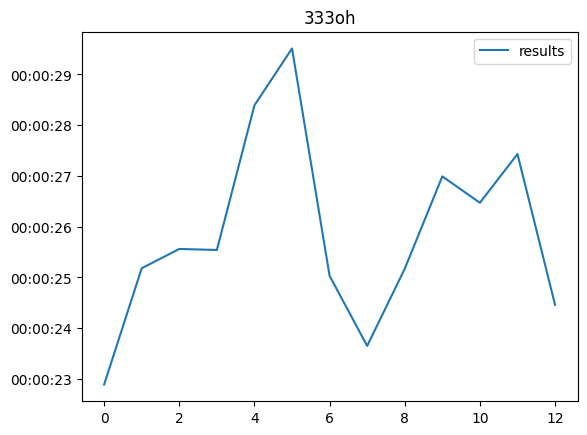

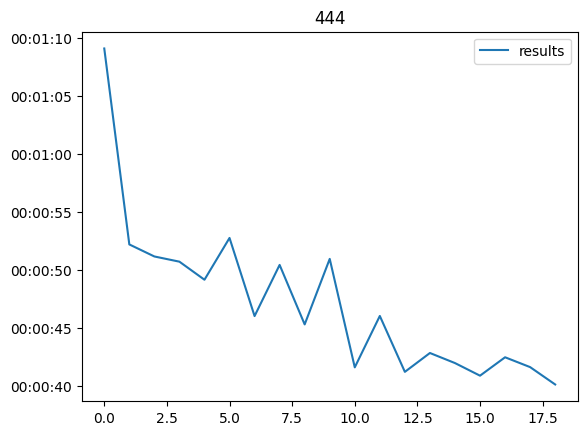

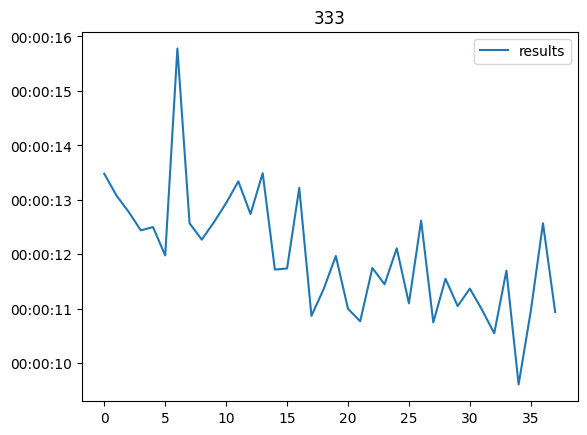

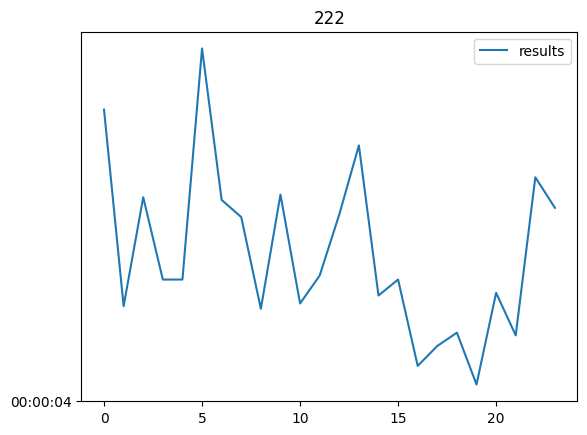

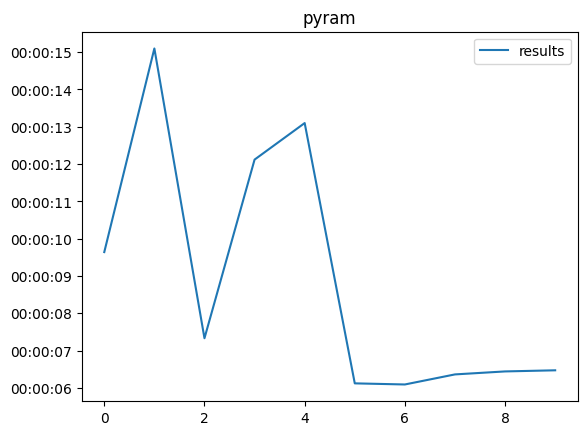

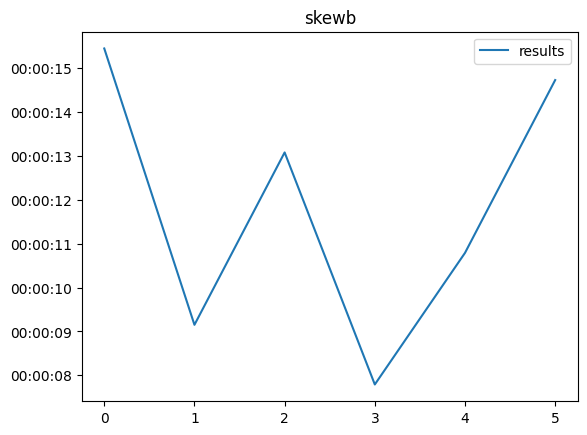

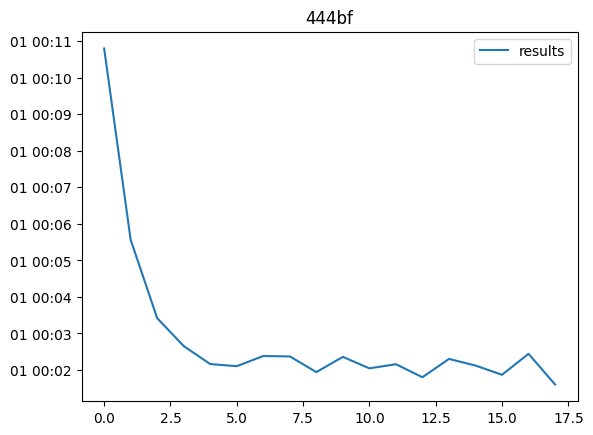

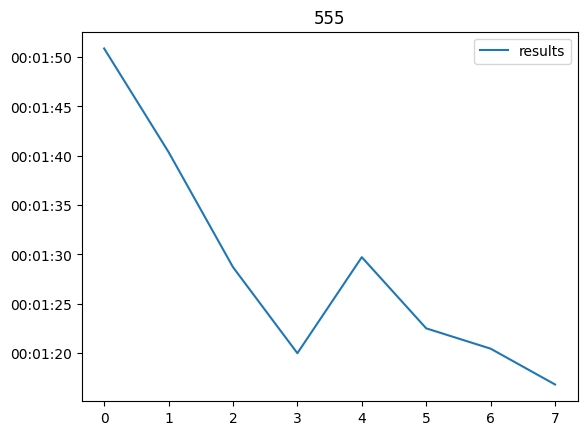

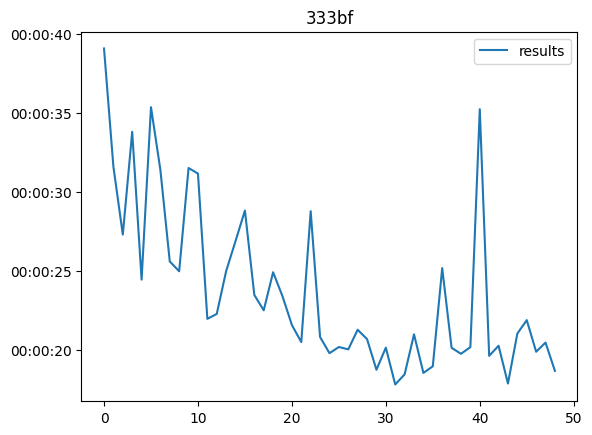

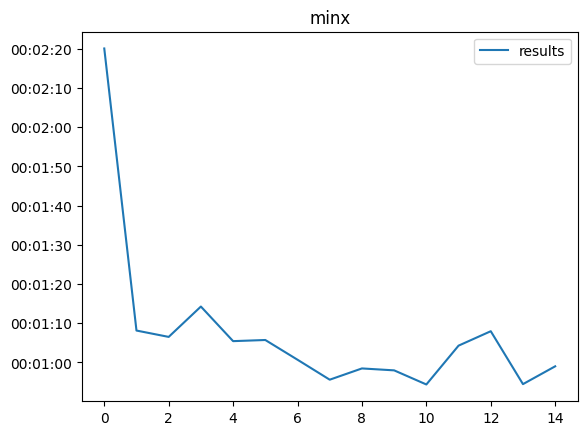

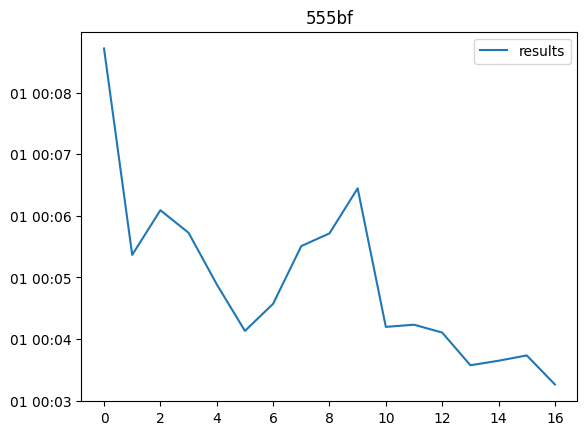

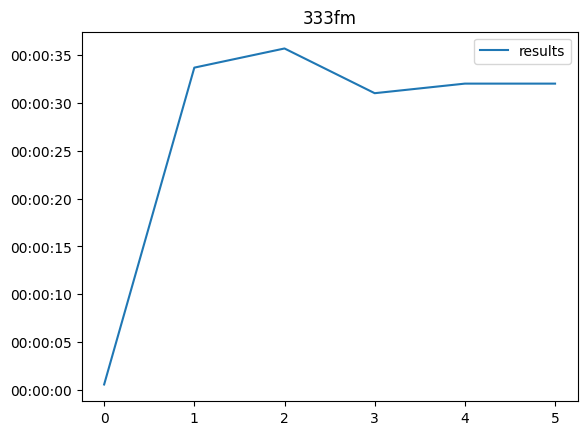

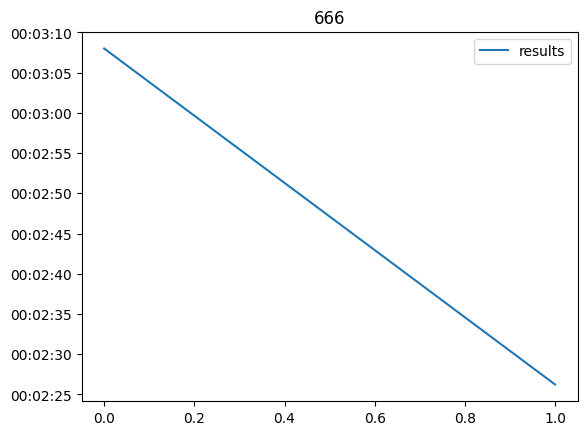

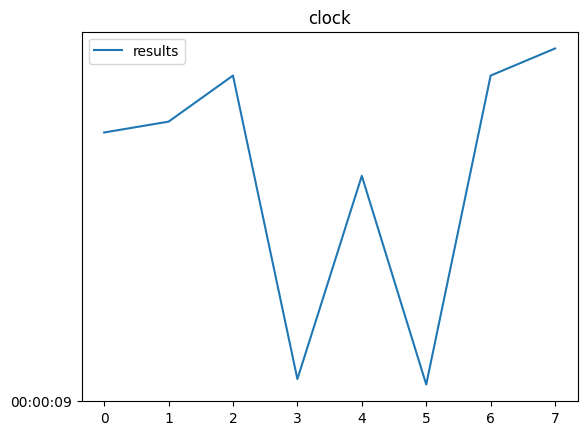

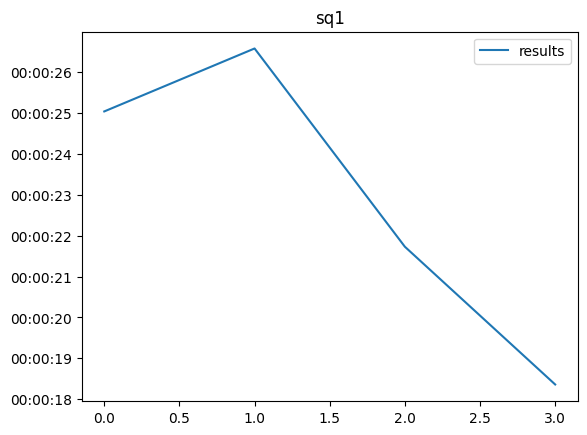

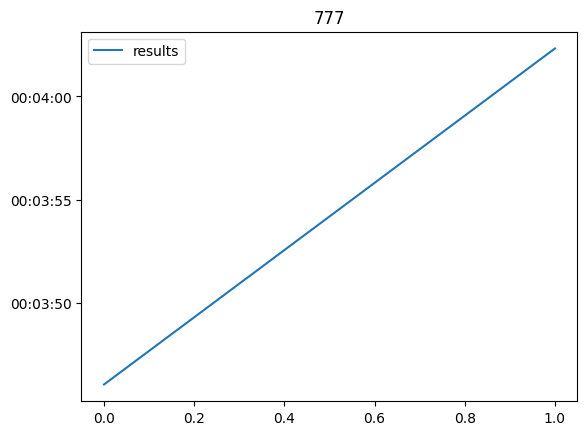

In [79]:
for k, v in res_dict.items():
    make_plot(k, v)


In [2]:
filepath = FILES_PATH / 'pl.txt'
with open(filepath, encoding='utf-8') as f:
    pl_dict = []
    for line in f:
        pl_dict.append(line.strip())
    

In [3]:
len(pl_dict)

4075605

In [6]:
import re

VOVELS = ['a', 'e', 'i', 'o', 'u', 'y']

lp = 'CO'

regex = '^' + lp[0]  + lp[1]

filtered_words = [i for i in pl_dict if re.match(regex, i.upper()) and len(i) > 3]

with open(FILES_PATH / 'search.txt', 'w') as f:
    for word in filtered_words:
        f.write(f'{word}\n') 
